In [2]:
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols, glm

In [3]:
wine = pd.read_csv("C:\\Users\\masterT\\Desktop\\빅데이터\\강의자료\\wine.csv")

In [6]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
red_wine_quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [8]:
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']
white_wine_quality

1599    6
1600    6
1601    6
1602    6
1603    6
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 4898, dtype: int64

In [9]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [10]:
Rformula =  'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'
regression_result = ols(Rformula, data = wine).fit()

In [11]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:02:38   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
sample1 = wine[wine.columns.difference(['quality', 'type'])]
sample1 = sample1[0:5][:]

In [17]:
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [20]:
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [21]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [23]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],
"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,
0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,
99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],
"alcohol":[9.0, 0.88]}
sample2 = pd.DataFrame(data, columns = sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [24]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\masterT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

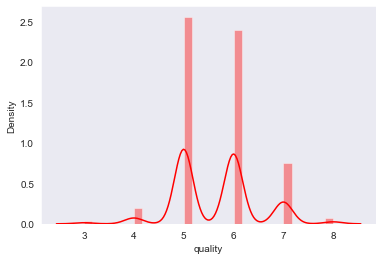

In [26]:
sns.set_style('dark')
sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')

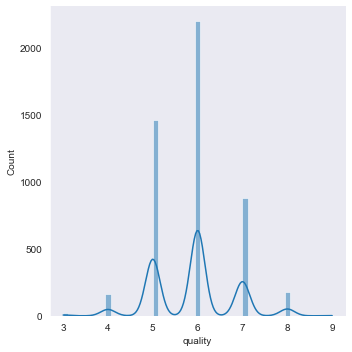

In [27]:
sns.displot(white_wine_quality, kde=True, label="white wine")

Text(0.5, 1.0, 'Quality of wine Type')

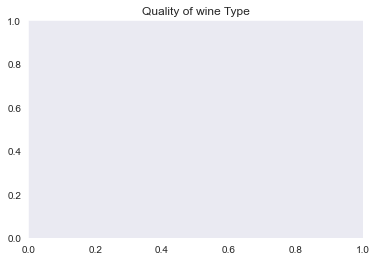

In [28]:
plt.title("Quality of wine Type")

No handles with labels found to put in legend.


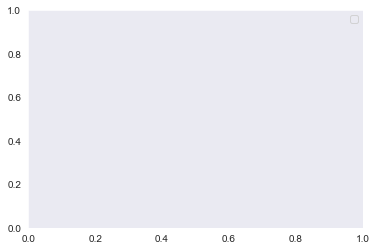

In [29]:
plt.legend()

In [30]:
plt.show()

In [31]:
import statsmodels.api as sm

In [33]:
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

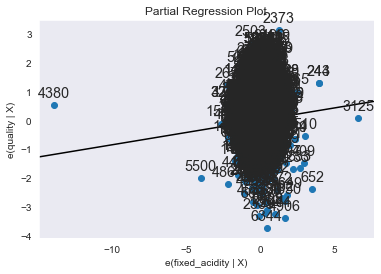

In [34]:
p, resids = sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data=wine, ret_coords=True)

In [35]:
plt.show()

In [36]:
fig = plt.figure(figsize=(8,13))

<Figure size 576x936 with 0 Axes>

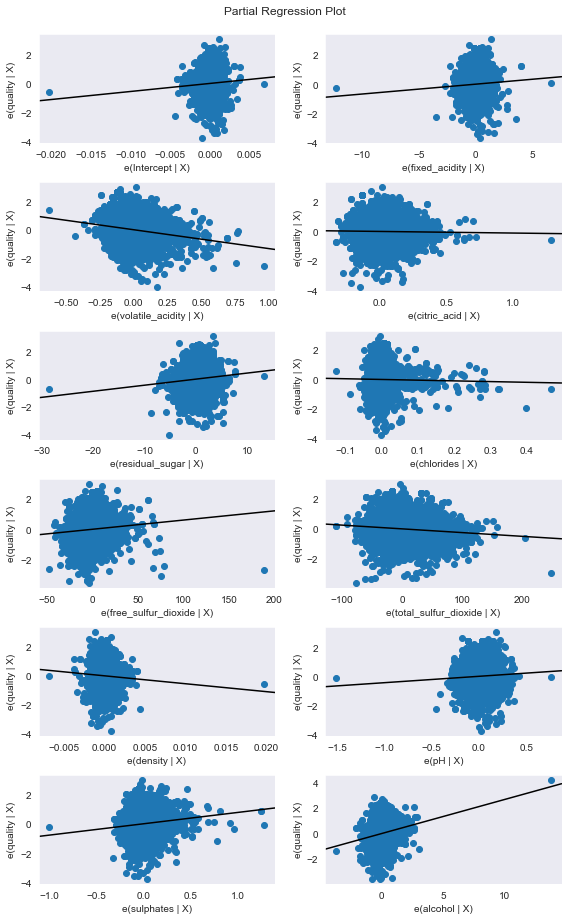

In [37]:
sm.graphics.plot_partregress_grid(regression_result, fig = fig)

In [38]:
plt.show()

In [39]:
import seaborn as sns
import pandas as pd

In [40]:
titanic = sns.load_dataset('titanic')
titanic.to_csv('C:\\Users\\masterT\\Desktop\\빅데이터\강의자료\\titanic.csv', index=False)

In [41]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [42]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [44]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [45]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [46]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [47]:
titanic['deck'] = titanic['deck'].fillna('C')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [49]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

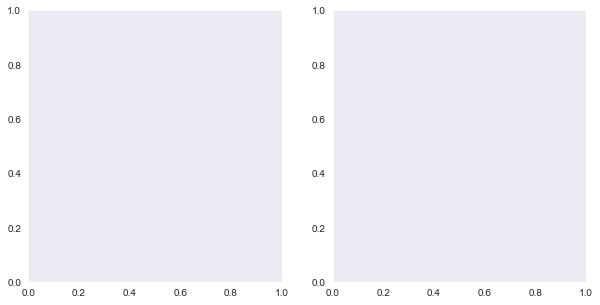

In [50]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))

In [53]:
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode=[0, 0.1], autopct = "%1.1f%%", ax = ax[0], shadow=True)

<AxesSubplot:ylabel='survived'>

In [58]:
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)

<AxesSubplot:ylabel='survived'>

In [59]:
ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')

Text(0.5, 1.0, 'Survived(Female)')

C:\Users\masterT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

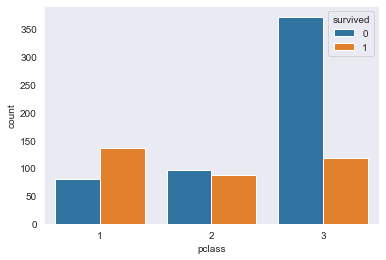

In [67]:
sns.countplot('pclass', hue = 'survived', data=titanic)

Text(0.5, 1.0, 'Pclass vs Survived')

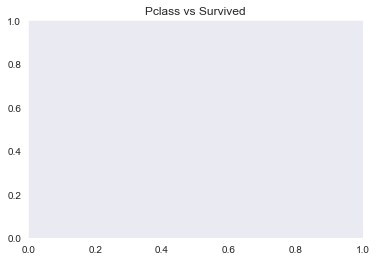

In [68]:
plt.title('Pclass vs Survived')

In [69]:
plt.show()

In [71]:
titanic_corr = titanic.corr(method = 'pearson')

In [72]:
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [77]:
titanic_corr.to_csv('C:\\Users\\masterT\\Desktop\\빅데이터\\강의자료\\titanic_corr.csv', index=False)

In [78]:
 titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

In [79]:
titanic['survived'].corr(titanic['fare'])

0.25730652238496227

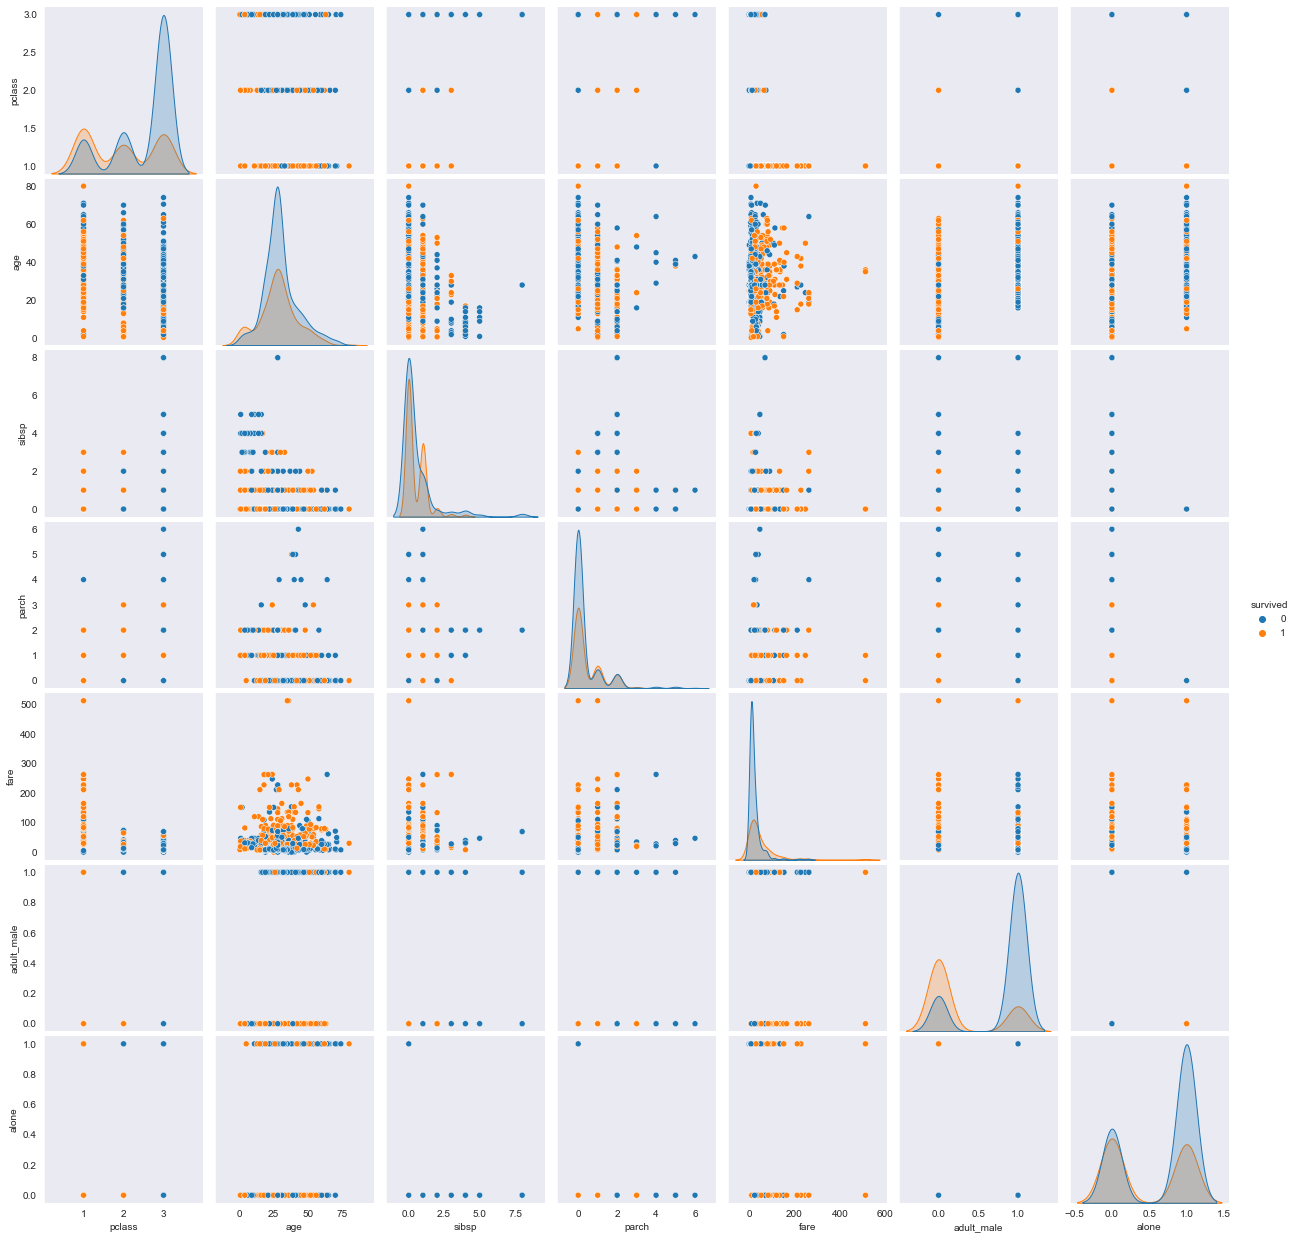

In [80]:
sns.pairplot(titanic, hue='survived')

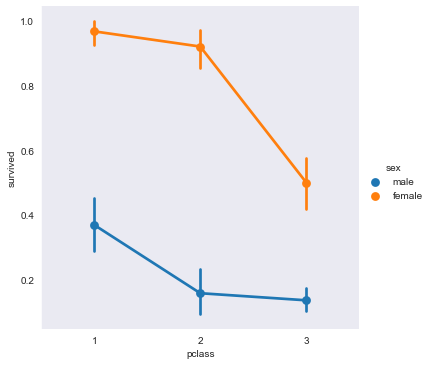

In [81]:
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')

In [82]:
def category_age(x):
        if x < 10:
           return 0
        elif x < 20:
           return 1
        elif x < 30:
           return 2
        elif x < 40:
           return 3
        elif x < 50:
            return 4
        elif x < 60:
           return 5
        elif x < 70:
           return 6
        else:
           return 7

In [83]:
titanic['age2'] = titanic['age'].apply(category_age)

In [84]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [85]:
titanic['sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int64

In [86]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [87]:
titanic['family']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: family, Length: 891, dtype: int64

In [88]:
titanic.to_csv('C:\\Users\\masterT\\Desktop\\빅데이터\\강의자료\\titanic3.csv', index=False)

In [89]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

In [92]:
colormap = plt.cm.RdBu

<AxesSubplot:>

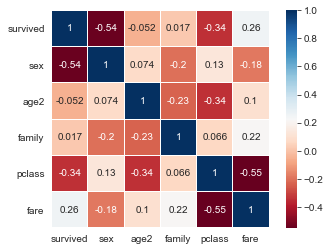

In [94]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10})